# About

Univariate analysis takes single-feature data (a.k.a. variables, attributes) and summarizes it to find patterns in the data. Simple summary statistics are applied on univariate data.

# Libraries

In [30]:
%run general_fv.ipynb

User information is ready!


In [ ]:
from pyspark.sql.functions import col, skewness, kurtosis

* [col](https://spark.apache.org/docs/latest/api/python//reference/pyspark.sql/api/pyspark.sql.functions.col.html): Returns a Column based on the given column name
* [Skewness](https://spark.apache.org/docs/latest/api/python//reference/pyspark.sql/api/pyspark.sql.functions.kurtosis.html?highlight=kurtosis#pyspark.sql.functions.kurtosis): Aggregate function: returns the skewness of the values in a group.
* [Kurtosis](https://spark.apache.org/docs/latest/api/python//reference/pyspark.sql/api/pyspark.sql.functions.kurtosis.html?highlight=kurtosis#pyspark.sql.functions.kurtosis): Aggregate function: returns the kurtosis of the values in a group.


In [ ]:
from pyspark.sql.functions import  min, max

In [ ]:
from pyspark_dist_explore import hist as pyspark_hist

In [112]:
import seaborn as sns

# Functions defined by author of source

In [9]:
def describe_pd(data, columns, deciles=False):
    '''
    Function to union the basic stats results and deciles
    :param data: the input dataframe
    :param columns: the cloumn name list of the numerical variable
    :param deciles: the deciles output

    :return : the numerical describe info. of the input dataframe

    :author: Ming Chen and Wenqiang Feng
    :email:  von198@gmail.com
    '''

    if deciles:
        percentiles = np.array(range(0, 110, 10))
    else:
        percentiles = [25, 50, 75]

    percs = np.transpose([np.percentile(data.select(x).collect(), percentiles) for x in columns])
    percs = pd.DataFrame(percs, columns=columns)
    percs['summary'] = [str(p) + '%' for p in percentiles]

    spark_describe = data.describe().toPandas()
    new_df = pd.concat([spark_describe, percs],ignore_index=True)
    new_df = new_df.round(2)
    return new_df[['summary'] + columns]

# User-Defined Functions

# Data

In [33]:
sqlq = "SELECT pm25 FROM `sima_station_CE` where datetime > \'2021-03-01\'"
data = ps_sqlq(sqlq, True)
data

/home/cesar/anaconda3/envs/spark_env/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


DataFrame[pm25: double]

# Data Exploration for numerical data

## * Describe()

In [5]:
data.describe().show()

+-------+-----------------+
|summary|               _1|
+-------+-----------------+
|  count|             9911|
|   mean|21.23093633336697|
| stddev|15.82183737408875|
|    min|              0.0|
|    max|            140.0|
+-------+-----------------+



## * Percentiles

In [35]:
# Function was defined by author of source
columns = ["pm25"]
describe_pd(data, columns, deciles=False)

,summary,pm25
0,count,9911
1,mean,21.23093633336697
2,stddev,15.82183737408875
3,min,0.0
4,max,140.0
5,25%,11.0
6,50%,18.0
7,75%,29.0


In [36]:
describe_pd(data, columns, deciles=True)

,summary,pm25
0,count,9911
1,mean,21.23093633336697
2,stddev,15.82183737408875
3,min,0.0
4,max,140.0
5,0%,0.0
6,10%,5.0
7,20%,9.0
8,30%,12.0
9,40%,15.0


## * Skewness and Kurtosis + Histogram

* **Skewness**: Measure of asymmetry for the probability distribution function (pdf) of a variable about its mean.
    * A value of zero indicates that there is no skewness in the distribution at all, meaning the distribution is perfectly symmetrical.    
    * **Negative skew** indicates that the tail is on the left side of the distribution, which extends towards more negative values.
    * **Positive skew** indicates that the tail is on the right side of the distribution, which extends towards more positive values.


* **Kurtosis**: Kurtosis is a measure of whether or not a distribution is heavy-tailed or light-tailed relative to a normal distribution.
    * The kurtosis of a normal distribution is 3.
    * It is called `playkurtic` if kurtosis < 3. This means it tends to produce fewer and less extreme outliers than the normal distribution.
    * It is called `leptokurtic` if kurtosis > 3. This means it tends to produce more outliers than the normal distribution.

[Source](https://www.statology.org/how-to-report-skewness-kurtosis/)

![Test](https://runawayhorse001.github.io/LearningApacheSpark/_images/skewed.png)


In [38]:
var = "pm25"
data.select(skewness(var),kurtosis(var)).show()

+------------------+------------------+
|    skewness(pm25)|    kurtosis(pm25)|
+------------------+------------------+
|1.3416046018209498|2.8324194712616535|
+------------------+------------------+



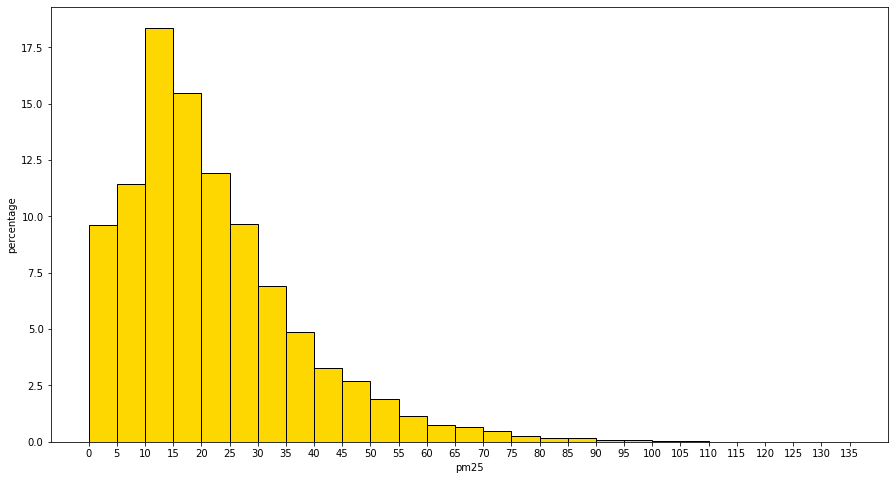

In [106]:
x = data.select(var).toPandas()

bins_arr = np.arange(0, 140, 5.0)

plt.figure(figsize=(15,8))

# Histogram
plt.hist(x # Input array
         , bins_arr # Bins array
         , histtype='bar', color='gold', ec='black' # [Type, Color, Edge color]
         , weights=np.zeros_like(x) + 100. / x.size) # Y-Axis weight

plt.xlabel(var)
plt.ylabel('percentage')
plt.xticks(bins)
plt.show()

(array([9.520e+02, 1.134e+03, 1.821e+03, 1.532e+03, 1.181e+03, 9.580e+02,
        6.850e+02, 4.830e+02, 3.260e+02, 2.660e+02, 1.860e+02, 1.120e+02,
        7.300e+01, 6.400e+01, 4.800e+01, 2.700e+01, 1.700e+01, 1.800e+01,
        9.000e+00, 9.000e+00, 4.000e+00, 4.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115., 120., 125., 130., 135., 140.]),
 <BarContainer object of 28 artists>)

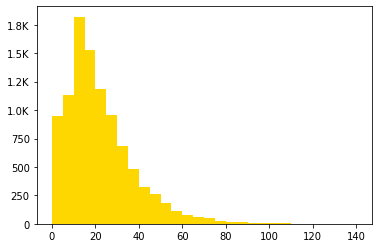

In [114]:
# Alternative without transforming back to Pandas
fig, ax = plt.subplots()
pyspark_hist(ax, data.select(var), bins = len(bins_arr), color=['gold'])

# Boxplot and Violin plot
The unquestionable advantage of the **violin plot** over the box plot is that aside from showing the same statistics, it also shows the entire distribution of the data. This is of interest, especially when dealing with multimodal data, i.e., a distribution with more than one peak.

![Comparison](https://miro.medium.com/max/520/1*TTMOaNG1o4PgQd-e8LurMg.png)

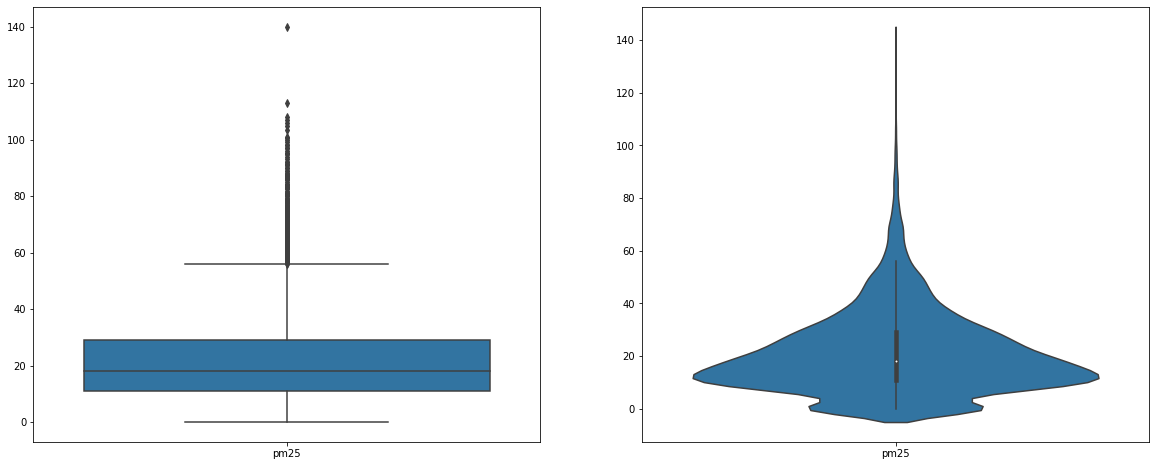

In [113]:
x = data.select(var).toPandas()

fig = plt.figure(figsize=(20, 8))

# Boxplot
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

# Violin plot
ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

# Data Exploration for categorical data

## Frequency table

In [131]:
sqlq = """
SELECT
count( case when `SE` > 0 then 1 end) as SE
, count( case when `NE` > 0 then 1 end) as NE
, count( case when `CE` > 0 then 1 end) as CE
, count( case when `NO` > 0 then 1 end) as NO
, count( case when `SO` > 0 then 1 end) as SO
, count( case when `NO2` > 0 then 1 end) as NO2
, count( case when `NTE` > 0 then 1 end) as NTE
, count( case when `NE2` > 0 then 1 end) as NE2
, count( case when `SE2` > 0 then 1 end) as SE2
, count( case when `SO2` > 0 then 1 end) as SO2
, count( case when `SE3` > 0 then 1 end) as SE3
, count( case when `SUR` > 0 then 1 end) as SUR
, count( case when `NTE2` > 0 then 1 end) as NTE2
, count( case when `NE3` > 0 then 1 end) as NE3
FROM `sima_pm25`
where datetime >= '2021-03-01'
"""
cat_data = ps_sqlq(sqlq, False)
freq_cat = cat_data.T.reset_index()
freq_cat.columns = ["Station", "Count"]


/home/cesar/anaconda3/envs/spark_env/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [140]:
freq_cat.sort_values("Count", ascending = False)

,Station,Count
0,SE,9275
1,NE,9616
2,CE,9019
3,NO,8849
4,SO,9424
5,NO2,9284
6,NTE,8544
7,NE2,9270
8,SE2,8504
9,SO2,9528


## Pie plot (Pandas df)

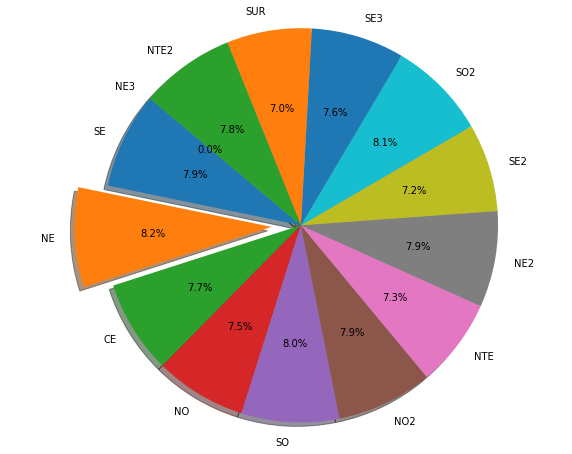

In [145]:
# Data to plot
labels = freq_cat.Station
sizes =  freq_cat.Count
#colors = ['gold', 'yellowgreen', 'lightcoral','blue', 'lightskyblue','green','red']
explode = (0, 0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes, explode=explode, labels=labels, #colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Bar plot (Pandas df)

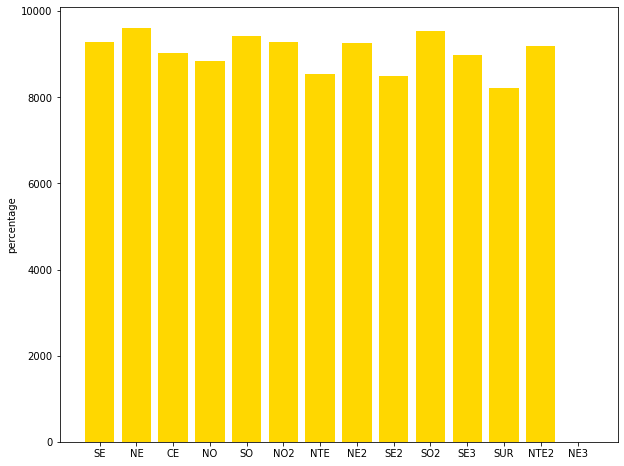

In [148]:
labels = freq_cat.Station
counter =  freq_cat.Count
ind = [x for x, _ in enumerate(labels)]

plt.figure(figsize=(10,8))
plt.bar(ind, counter, width=0.8, color='gold')

plt.xticks(ind, labels)
plt.ylabel("percentage")

plt.show()